In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [66]:
food_waste = pd.read_csv("01_FOOD_WASTE.csv", encoding='cp949')
resident_pop = pd.read_csv("03_RESIDENT_POP.csv", encoding='cp949')
card_spending = pd.read_csv("04_CARD_SPENDING.csv", encoding='cp949')

c:\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [67]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [68]:
food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110540,이도2동,W6X063,26,64650,1933
2,2018-01-01,제주시,50110630,아라동,W6X064,15,33500,1001
3,2018-01-01,제주시,50110610,삼양동,W6X065,4,8400,252
4,2018-01-01,제주시,50110540,이도2동,W6X066,21,51450,1538
...,...,...,...,...,...,...,...,...
2209856,2020-12-14,서귀포시,50130250,대정읍,W6Y722,16,26950,805
2209857,2020-12-14,서귀포시,50130250,대정읍,W6Y72A,3,17000,510
2209858,2020-12-14,서귀포시,50130310,안덕면,W6Y72B,5,5650,168
2209859,2020-12-14,서귀포시,50130310,안덕면,W6Y72C,11,20700,619


In [69]:
food_waste['base_date'] = pd.to_datetime(food_waste['base_date'])

In [70]:
food_waste['year'] = food_waste['base_date'].dt.year

In [71]:
food_waste['month'] = food_waste['base_date'].dt.month

In [72]:
foodwaste = food_waste.groupby(['year','month', 'emd_nm'])['em_g'].sum().reset_index()

In [73]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,41102950
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


<AxesSubplot:ylabel='Frequency'>

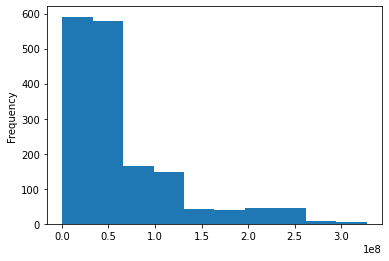

In [74]:
foodwaste['em_g'].plot.hist()

In [75]:
foodwaste['em_g'] = np.log(foodwaste[['em_g']])

<AxesSubplot:ylabel='Frequency'>

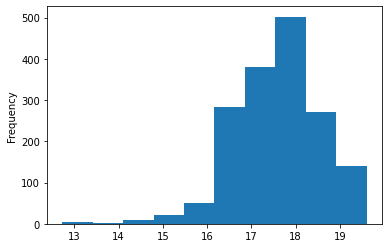

In [76]:
foodwaste['em_g'].plot.hist()

<AxesSubplot:ylabel='em_g'>

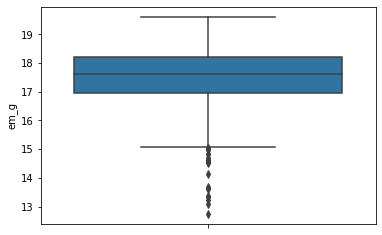

In [77]:
sns.boxplot(y='em_g',data=foodwaste)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
foodwaste['em_g'] = scaler.fit_transform(foodwaste[['em_g']])

In [80]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,0.062786
1,2018,1,남원읍,-0.014238
2,2018,1,노형동,1.921404
3,2018,1,대륜동,0.308802
4,2018,1,대정읍,-0.106610
...,...,...,...,...
1661,2021,6,표선면,-0.048008
1662,2021,6,한경면,-0.489732
1663,2021,6,한림읍,0.691381
1664,2021,6,화북동,0.999399


In [81]:
foodwaste_month = food_waste.groupby(['year','month'])['em_g'].sum().reset_index()

In [82]:
foodwaste_month

,year,month,em_g
0,2018,1,2419027050
1,2018,2,2245207250
2,2018,3,2460504700
3,2018,4,2263294900
4,2018,5,2323652300
5,2018,6,2439064065
6,2018,7,2941837450
7,2018,8,2762018600
8,2018,9,2405165000
9,2018,10,2263879050


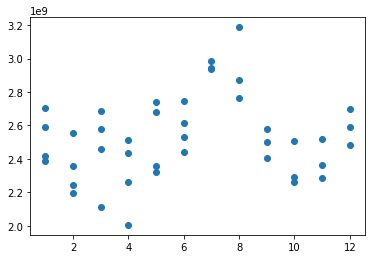

In [83]:
plt.scatter(x = 'month', y = 'em_g', data = foodwaste_month)

In [95]:
resident_pop.head()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234


In [97]:
resident_pop.rename(columns = {resident_pop.columns[0]:"year", resident_pop.columns[1]:"month"}, inplace=True)

In [98]:
residentpop = resident_pop.groupby(['year','month', 'emd_nm', 'sex'])['resid_reg_pop','foreign_pop','total_pop'].sum().reset_index()

<ipython-input-98-ff75055fb85a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  residentpop = resident_pop.groupby(['year','month', 'emd_nm', 'sex'])['resid_reg_pop','foreign_pop','total_pop'].sum().reset_index()


In [99]:
residentpop

,year,month,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,건입동,남성,5085,146,5231
1,2018,1,건입동,여성,4715,82,4797
2,2018,1,구좌읍,남성,7965,368,8333
3,2018,1,구좌읍,여성,7609,184,7793
4,2018,1,남원읍,남성,9806,428,10234
...,...,...,...,...,...,...,...
3607,2021,6,한림읍,여성,10341,1140,11481
3608,2021,6,화북동,남성,12062,169,12231
3609,2021,6,화북동,여성,12238,161,12399
3610,2021,6,효돈동,남성,2660,39,2699


In [100]:
residentpop.loc[:,['resid_reg_pop', 'foreign_pop','total_pop']].corr()

,resid_reg_pop,foreign_pop,total_pop
resid_reg_pop,1.000000,0.546006,0.998927
foreign_pop,0.546006,1.000000,0.584216
total_pop,0.998927,0.584216,1.000000


In [101]:
residentpop = residentpop.drop(['total_pop'], axis=1)

In [102]:
residentpop

,year,month,emd_nm,sex,resid_reg_pop,foreign_pop
0,2018,1,건입동,남성,5085,146
1,2018,1,건입동,여성,4715,82
2,2018,1,구좌읍,남성,7965,368
3,2018,1,구좌읍,여성,7609,184
4,2018,1,남원읍,남성,9806,428
...,...,...,...,...,...,...
3607,2021,6,한림읍,여성,10341,1140
3608,2021,6,화북동,남성,12062,169
3609,2021,6,화북동,여성,12238,161
3610,2021,6,효돈동,남성,2660,39


In [104]:
residentpop_month = resident_pop.groupby(['year','month'])['resid_reg_pop','foreign_pop'].sum().reset_index()

<ipython-input-104-e47749d1dbe3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  residentpop_month = resident_pop.groupby(['year','month'])['resid_reg_pop','foreign_pop'].sum().reset_index()


In [105]:
residentpop_month

,year,month,resid_reg_pop,foreign_pop
0,2018,1,658167,21755
1,2018,2,659189,21906
2,2018,3,660441,22010
3,2018,4,661511,22184
4,2018,5,662633,23029
5,2018,6,663465,23315
6,2018,7,664579,23632
7,2018,8,665517,24007
8,2018,9,666151,24414
9,2018,10,666686,24711


In [106]:
pearsonr(residentpop_month['resid_reg_pop'],foodwaste_month['em_g'])

(0.36173919984746733, 0.01857635058860304)

In [107]:
pearsonr(residentpop_month['foreign_pop'],foodwaste_month['em_g'])

(-0.04637557575068499, 0.7705658047087324)

<AxesSubplot:ylabel='Frequency'>

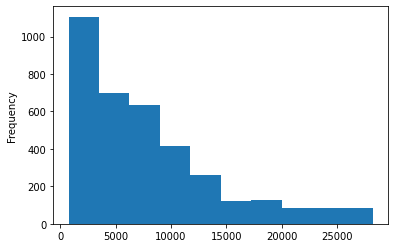

In [108]:
residentpop['resid_reg_pop'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

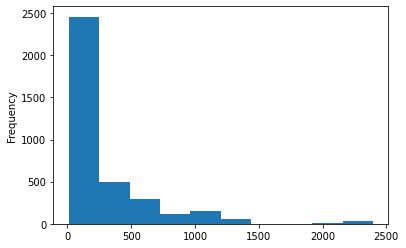

In [109]:
residentpop['foreign_pop'].plot.hist()

In [110]:
residentpop['resid_reg_pop'] = np.log(residentpop[['resid_reg_pop']])
residentpop['foreign_pop'] = np.log(residentpop[['foreign_pop']])

<AxesSubplot:ylabel='Frequency'>

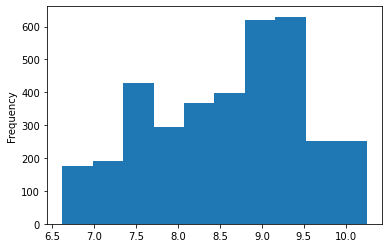

In [111]:
residentpop['resid_reg_pop'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

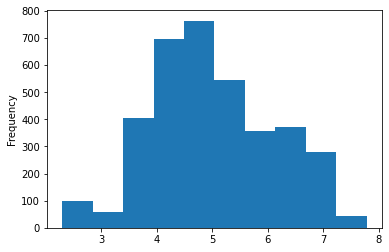

In [112]:
residentpop['foreign_pop'].plot.hist()

<AxesSubplot:ylabel='resid_reg_pop'>

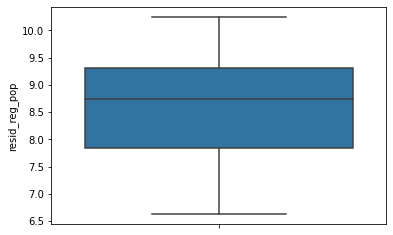

In [113]:
sns.boxplot(y='resid_reg_pop',data=residentpop)

<AxesSubplot:ylabel='foreign_pop'>

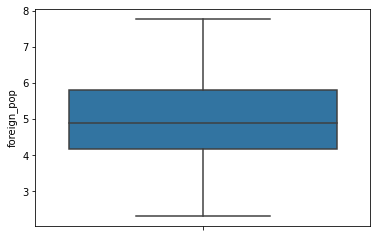

In [114]:
sns.boxplot(y='foreign_pop',data=residentpop)

In [115]:
residentpop['resid_reg_pop'] = scaler.fit_transform(residentpop[['resid_reg_pop']])
residentpop['foreign_pop'] = scaler.fit_transform(residentpop[['foreign_pop']])

In [116]:
residentpop

,year,month,emd_nm,sex,resid_reg_pop,foreign_pop
0,2018,1,건입동,남성,-0.066530,-0.030280
1,2018,1,건입동,여성,-0.149801,-0.554391
2,2018,1,구좌읍,남성,0.428123,0.809620
3,2018,1,구좌읍,여성,0.377722,0.179886
4,2018,1,남원읍,남성,0.657325,0.946842
...,...,...,...,...,...,...
3607,2021,6,한림읍,여성,0.715879,1.836878
3608,2021,6,화북동,남성,0.885565,0.102628
3609,2021,6,화북동,여성,0.901532,0.058571
3610,2021,6,효돈동,남성,-0.780761,-1.229560


In [117]:
residentpop = pd.get_dummies(residentpop, columns=['sex'])

In [118]:
residentpop = residentpop.drop(['sex_여성'],axis=1)

In [119]:
residentpop

,year,month,emd_nm,resid_reg_pop,foreign_pop,sex_남성
0,2018,1,건입동,-0.066530,-0.030280,1
1,2018,1,건입동,-0.149801,-0.554391,0
2,2018,1,구좌읍,0.428123,0.809620,1
3,2018,1,구좌읍,0.377722,0.179886,0
4,2018,1,남원읍,0.657325,0.946842,1
...,...,...,...,...,...,...
3607,2021,6,한림읍,0.715879,1.836878,0
3608,2021,6,화북동,0.885565,0.102628,1
3609,2021,6,화북동,0.901532,0.058571,0
3610,2021,6,효돈동,-0.780761,-1.229560,1


In [120]:
card_spending.head(100)

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
5,2018-01-22,제주시,50110650,연동,C00900,주점및주류판매,49,2212446
6,2018-01-22,제주시,50110650,연동,C00200,양식,98,2912705
7,2018-01-26,제주시,50110650,연동,C00200,양식,182,7191382
8,2018-01-30,제주시,50110650,연동,C01000,식품,481,18497443
9,2018-01-31,제주시,50110650,연동,C00500,패스트푸드,555,8944547


In [121]:
card_spending['base_date'] = pd.to_datetime(card_spending['base_date'])

In [122]:
card_spending['year'] = card_spending['base_date'].dt.year

In [123]:
card_spending['month'] = card_spending['base_date'].dt.month

In [124]:
cardspending = card_spending.groupby(['year','month', 'emd_nm', 'mct_cat_nm']).sum().reset_index()

In [125]:
cardspending

,year,month,emd_nm,mct_cat_nm,use_cnt,use_amt
0,2018,1,건입동,간식,4540,52714107
1,2018,1,건입동,농축수산물,1699,180535251
2,2018,1,건입동,마트/슈퍼마켓,17547,613458055
3,2018,1,건입동,배달,585,11571838
4,2018,1,건입동,부페,55,5081850
...,...,...,...,...,...,...
20000,2021,6,효돈동,아시아음식,720,25716378
20001,2021,6,효돈동,양식,225,9302910
20002,2021,6,효돈동,주점및주류판매,105,4039593
20003,2021,6,효돈동,패스트푸드,1205,20827922


In [126]:
cardspending.loc[:,['use_cnt','use_amt']].corr()

,use_cnt,use_amt
use_cnt,1.0000,0.9815
use_amt,0.9815,1.0000


In [127]:
cardspending = cardspending.drop(['use_amt'], axis=1)

In [128]:
cardspending

,year,month,emd_nm,mct_cat_nm,use_cnt
0,2018,1,건입동,간식,4540
1,2018,1,건입동,농축수산물,1699
2,2018,1,건입동,마트/슈퍼마켓,17547
3,2018,1,건입동,배달,585
4,2018,1,건입동,부페,55
...,...,...,...,...,...
20000,2021,6,효돈동,아시아음식,720
20001,2021,6,효돈동,양식,225
20002,2021,6,효돈동,주점및주류판매,105
20003,2021,6,효돈동,패스트푸드,1205


In [129]:
cardspending_month = card_spending.groupby(['year','month'])['use_cnt'].sum().reset_index()

In [130]:
cardspending_month

,year,month,use_cnt
0,2018,1,3455222
1,2018,2,3048909
2,2018,3,3609337
3,2018,4,3653445
4,2018,5,3905205
5,2018,6,3845526
6,2018,7,4067618
7,2018,8,4165182
8,2018,9,3856614
9,2018,10,3865653


In [131]:
pearsonr(cardspending_month['use_cnt'],foodwaste_month['em_g'])

(0.6433043845221641, 4.329826221907083e-06)

<AxesSubplot:ylabel='Frequency'>

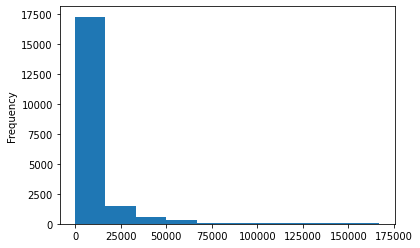

In [132]:
cardspending['use_cnt'].plot.hist()

In [133]:
cardspending['use_cnt'] = np.log(cardspending[['use_cnt']])

<AxesSubplot:ylabel='Frequency'>

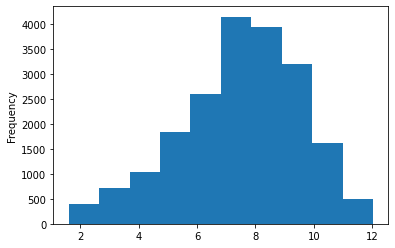

In [134]:
cardspending['use_cnt'].plot.hist()

<AxesSubplot:ylabel='use_cnt'>

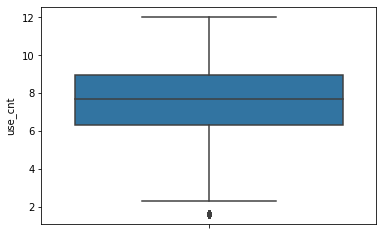

In [135]:
sns.boxplot(y='use_cnt',data=cardspending)

In [136]:
cardspending['use_cnt'] = scaler.fit_transform(cardspending[['use_cnt']])

In [137]:
cardspending

,year,month,emd_nm,mct_cat_nm,use_cnt
0,2018,1,건입동,간식,0.446883
1,2018,1,건입동,농축수산물,-0.026412
2,2018,1,건입동,마트/슈퍼마켓,1.097897
3,2018,1,건입동,배달,-0.539816
4,2018,1,건입동,부페,-1.678298
...,...,...,...,...,...
20000,2021,6,효돈동,아시아음식,-0.439830
20001,2021,6,효돈동,양식,-0.999928
20002,2021,6,효돈동,주점및주류판매,-1.366925
20003,2021,6,효돈동,패스트푸드,-0.191848


In [138]:
cardspending = pd.get_dummies(cardspending, columns=['mct_cat_nm'])

In [139]:
cardspending = cardspending.drop(['mct_cat_nm_한식'],axis=1)

In [140]:
cardspending

,year,month,emd_nm,use_cnt,mct_cat_nm_간식,mct_cat_nm_농축수산물,mct_cat_nm_마트/슈퍼마켓,mct_cat_nm_배달,mct_cat_nm_부페,mct_cat_nm_식품,mct_cat_nm_아시아음식,mct_cat_nm_양식,mct_cat_nm_주점및주류판매,mct_cat_nm_패스트푸드
0,2018,1,건입동,0.446883,1,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,-0.026412,0,1,0,0,0,0,0,0,0,0
2,2018,1,건입동,1.097897,0,0,1,0,0,0,0,0,0,0
3,2018,1,건입동,-0.539816,0,0,0,1,0,0,0,0,0,0
4,2018,1,건입동,-1.678298,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000,2021,6,효돈동,-0.439830,0,0,0,0,0,0,1,0,0,0
20001,2021,6,효돈동,-0.999928,0,0,0,0,0,0,0,1,0,0
20002,2021,6,효돈동,-1.366925,0,0,0,0,0,0,0,0,1,0
20003,2021,6,효돈동,-0.191848,0,0,0,0,0,0,0,0,0,1


In [141]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,0.062786
1,2018,1,남원읍,-0.014238
2,2018,1,노형동,1.921404
3,2018,1,대륜동,0.308802
4,2018,1,대정읍,-0.106610
...,...,...,...,...
1661,2021,6,표선면,-0.048008
1662,2021,6,한경면,-0.489732
1663,2021,6,한림읍,0.691381
1664,2021,6,화북동,0.999399


In [153]:
residentpop_merge = foodwaste.merge(residentpop, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [154]:
residentpop_merge

,year,month,emd_nm,em_g,resid_reg_pop,foreign_pop,sex_남성
0,2018,1,건입동,0.062786,-0.066530,-0.030280,1
1,2018,1,건입동,0.062786,-0.149801,-0.554391,0
2,2018,1,남원읍,-0.014238,0.657325,0.946842,1
3,2018,1,남원읍,-0.014238,0.599638,0.255639,0
4,2018,1,노형동,1.921404,1.744201,1.538648,1
...,...,...,...,...,...,...,...
3263,2021,6,한림읍,0.691381,0.715879,1.836878,0
3264,2021,6,화북동,0.999399,0.885565,0.102628,1
3265,2021,6,화북동,0.999399,0.901532,0.058571,0
3266,2021,6,효돈동,-0.470617,-0.780761,-1.229560,1


In [155]:
residentpop_x = residentpop_merge.loc[:,['resid_reg_pop', 'foreign_pop','sex_남성']]
residentpop_y = residentpop_merge.loc[:,['em_g']]

In [156]:
residentpop_x = sm.add_constant(residentpop_x)

In [157]:
model1 = sm.OLS(residentpop_y, residentpop_x)

In [158]:
result1 = model1.fit()

In [159]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1296.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:59:08   Log-Likelihood:                -3080.3
No. Observations:                3268   AIC:                             6169.
Df Residuals:                    3264   BIC:                             6193.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0015      0.015      0.096      0.924      -0.029       0.032
resid_reg_pop     0.8107      0.017     48.486      0.000       0.778       0.843
foreign_pop      -0.1297      0.017     -7.603      0.000      -0.163      -0.096
sex_남성           -0.0150      0.022     -0.688      0.492      -0.058       0.028
==============================================================================
Omnibus:                     1546.806   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9950.183
Skew:                          -2.176   Prob(JB):                         0.00
Kurtosis:                      10.358   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
cardspending_merge = foodwaste.merge(cardspending, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [163]:
cardspending_merge

,year,month,emd_nm,em_g,use_cnt,mct_cat_nm_간식,mct_cat_nm_농축수산물,mct_cat_nm_마트/슈퍼마켓,mct_cat_nm_배달,mct_cat_nm_부페,mct_cat_nm_식품,mct_cat_nm_아시아음식,mct_cat_nm_양식,mct_cat_nm_주점및주류판매,mct_cat_nm_패스트푸드
0,2018,1,건입동,0.062786,0.446883,1,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,0.062786,-0.026412,0,1,0,0,0,0,0,0,0,0
2,2018,1,건입동,0.062786,1.097897,0,0,1,0,0,0,0,0,0,0
3,2018,1,건입동,0.062786,-0.539816,0,0,0,1,0,0,0,0,0,0
4,2018,1,건입동,0.062786,-1.678298,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,2021,6,효돈동,-0.470617,-0.439830,0,0,0,0,0,0,1,0,0,0
18079,2021,6,효돈동,-0.470617,-0.999928,0,0,0,0,0,0,0,1,0,0
18080,2021,6,효돈동,-0.470617,-1.366925,0,0,0,0,0,0,0,0,1,0
18081,2021,6,효돈동,-0.470617,-0.191848,0,0,0,0,0,0,0,0,0,1


In [164]:
cardspending_x = cardspending_merge.drop(['year', 'month','emd_nm', 'em_g', 'use_cnt'], axis=1)
cardspending_y = cardspending_merge.loc[:,['em_g']]

In [165]:
cardspending_x = sm.add_constant(cardspending_x)

In [166]:
model2 = sm.OLS(cardspending_y, cardspending_x)

In [167]:
result2 = model2.fit()

In [168]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.650
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0862
Time:                        19:03:13   Log-Likelihood:                -25581.
No. Observations:               18083   AIC:                         5.118e+04
Df Residuals:                   18072   BIC:                         5.127e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.691e-15      0.024  -6.93e-14      1.000      -0.048       0.048
mct_cat_nm_간식       3.265e-16      0.035   9.46e-15      1.000      -0.068       0.068
mct_cat_nm_농축수산물    3.298e-16      0.035   9.56e-15      1.000      -0.068       0.068
mct_cat_nm_마트/슈퍼마켓  3.286e-16      0.035   9.52e-15      1.000      -0.068       0.068
mct_cat_nm_배달       2.677e-16      0.035   7.76e-15      1.000      -0.068       0.068
mct_cat_nm_부페          0.1117      0.036      3.108      0.002       0.041       0.182
mct_cat_nm_식품       1.126e-16      0.035   3.26e-15      1.000      -0.068       0.068
mct_cat_nm_아시아음식    1.424e-16      0.035   4.13e-15      1.000      -0.068       0.068
mct_cat_nm_양식       9.958e-17      0.035   2.89e-15      1.000      -0.068       0.068
mct_cat_nm_주점및주류판매   1.39e-16      0.035   4.03e-15      1.000      -0.068       0.068
mct_cat_nm_패스트푸드    1.346e-16      0.035    3.9e-15      1.000      -0.068       0.068
==============================================================================
Omnibus:                     1458.475   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2691.937
Skew:                          -0.572   Prob(JB):                         0.00
Kurtosis:                       4.504   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""